# Supervised Learning: Regression on UK Used Car Data Set

- The main objective of this analysis is to predict price(£) of used Ford cars using a Linear Regression and different regularization regressions. 
- This analysis attempts to try both train-test-split and cross-validation to have an overview of how these two methods can lead to different decisions in terms of model selection. 



### About the Data

The data set used in this analysis is a part of 100,000 UK Used Car Data Set published on Kaggle in July 2020 by a member (Aditya). 
The author scraped the data from 100,000 listings, which have been separated into files corresponding to each car manufacturer
The cleaned data set contains information of price, transmission, mileage, fuel type, road tax, miles per gallon (mpg), and engine size.
 Duplicate listings removed and cleaned the columns
The cleaned data were then separated into .csv files corresponding with each car manufacturer.
 The Ford data set was selected for this analysis. This data set has 17,965 records and 9 variables. During the analysis, some duplicates were detected and removed, and also there was a row which car year was 2060, so this row was removed as well: remaining 17,810 records.


# 1. DATA PREPARATION, CLEANING AND EXPLORATORY DATA ANALYSIS

Dataset can be found here:
https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
sns.set()
%matplotlib inline

# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [2]:
# load the dataset
linktofile='F:\\Data Science\\IBM Machine Learning Specialization\\2. Supervised Machine Learning Regression\\final project\\raw data\\ford.csv'
data=pd.read_csv(linktofile)
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6


In [3]:
data.year[data.year>2020]

17726    2060
Name: year, dtype: int64

In [4]:
# lets remove row 17726 since we are not in 2060 yet :)

data.drop(17726,axis=0,inplace=True)
data.year[data.year>2020]

Series([], Name: year, dtype: int64)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17964 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17964 non-null  object 
 1   year          17964 non-null  int64  
 2   price         17964 non-null  int64  
 3   transmission  17964 non-null  object 
 4   mileage       17964 non-null  int64  
 5   fuelType      17964 non-null  object 
 6   tax           17964 non-null  int64  
 7   mpg           17964 non-null  float64
 8   engineSize    17964 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.4+ MB


So, there is no Null values. that is good news :)

In [6]:
data.dtypes.value_counts()

int64      4
object     3
float64    2
dtype: int64

there is only 3 object types here

In [7]:
# show only object type column names and number of unique values in each of them
data_object=data.columns[data.dtypes==object].to_list()
data[data_object].nunique()

model           23
transmission     3
fuelType         5
dtype: int64

In [8]:
# Lets see how many duplicate rows we have here
data.duplicated().sum()

154

In [9]:
# Lets extract the duplicated rows now
data.loc[data.duplicated(), :]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
159,Focus,2016,10995,Manual,30923,Diesel,0,74.3,1.5
312,Focus,2019,14998,Manual,7000,Petrol,145,58.9,1.0
349,Focus,2019,14998,Manual,7000,Petrol,145,58.9,1.0
510,EcoSport,2019,15489,Manual,5636,Diesel,145,68.9,1.5
512,Grand Tourneo Connect,2019,19999,Manual,3500,Diesel,145,61.4,1.5
...,...,...,...,...,...,...,...,...,...
14556,Mondeo,2015,6793,Manual,138000,Diesel,20,68.9,2.0
15121,Kuga,2017,14999,Manual,24877,Diesel,30,64.2,1.5
15127,EcoSport,2019,16799,Automatic,433,Petrol,150,45.6,1.0
15685,KA,2008,1795,Manual,63000,Petrol,160,45.6,1.3


In [10]:
# Drop duplicates while keeping first appearance and check the new data shape
data = data.drop_duplicates(keep='first').reset_index(drop=True)
data.shape

(17810, 9)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17810 entries, 0 to 17809
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17810 non-null  object 
 1   year          17810 non-null  int64  
 2   price         17810 non-null  int64  
 3   transmission  17810 non-null  object 
 4   mileage       17810 non-null  int64  
 5   fuelType      17810 non-null  object 
 6   tax           17810 non-null  int64  
 7   mpg           17810 non-null  float64
 8   engineSize    17810 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [12]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,17810.000000,17810.000000,17810.000000,17810.000000,17810.000000,17810.000000
mean,2016.860079,12270.103481,23380.413532,113.314992,57.909556,1.350640
std,2.026487,4736.260216,19418.185474,62.030508,10.132632,0.432597
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,10000.000000,30.000000,52.300000,1.000000
50%,2017.000000,11289.500000,18277.000000,145.000000,58.900000,1.200000
75%,2018.000000,15295.000000,31095.250000,145.000000,65.700000,1.500000
max,2020.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [13]:
data.describe(include=[object])  

,model,transmission,fuelType
count,17810,17810,17810
unique,23,3,5
top,Fiesta,Manual,Petrol
freq,6508,15382,12079


In [14]:
# lets replace 'year' column with 'age' column and drop 'year'. data collected in 2020, so age is calculated from 2020
data['age']=2020-data['year']
data.drop(['year'],axis=1,inplace=True)
data



,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age
0,Fiesta,12000,Automatic,15944,Petrol,150,57.7,1.0,3
1,Focus,14000,Manual,9083,Petrol,150,57.7,1.0,2
2,Focus,13000,Manual,12456,Petrol,150,57.7,1.0,3
3,Fiesta,17500,Manual,10460,Petrol,145,40.3,1.5,1
4,Fiesta,16500,Automatic,1482,Petrol,145,48.7,1.0,1
...,...,...,...,...,...,...,...,...,...
17805,Fiesta,7999,Manual,31348,Petrol,125,54.3,1.2,4
17806,B-MAX,8999,Manual,16700,Petrol,150,47.1,1.4,3
17807,B-MAX,7499,Manual,40700,Petrol,30,57.7,1.0,6
17808,Focus,9999,Manual,7010,Diesel,20,67.3,1.6,5


In [15]:
X=data.drop(['price'],axis=1)
Y=data.price

In [16]:
# Next split the data in train and test data sets
from sklearn.model_selection import train_test_split
train,test=train_test_split(data,test_size=0.3,random_state=42)

In [17]:
# Determine columns by data types in train set

cat_mask=train.dtypes==np.object
cat_cols=train.columns[cat_mask].to_list()
print('Categorical columns:', cat_cols)

num_mask=(train.dtypes==np.float64) | (train.dtypes==np.int64)
num_cols=train.columns[num_mask].to_list()
print('Numerical columns:', num_cols)

Categorical columns: ['model', 'transmission', 'fuelType']
Numerical columns: ['price', 'mileage', 'tax', 'mpg', 'engineSize', 'age']


### Determining Normality of target variable

Making our target variable normally distributed often will lead to better results

If our target is not normally distributed, we can apply a transformation to it (log,square root,boxcox) and then fit our regression to predict the transformed values.

How can we tell if our target is normally distributed? There are two ways:

* Visually
* Using a statistical test

<AxesSubplot:>

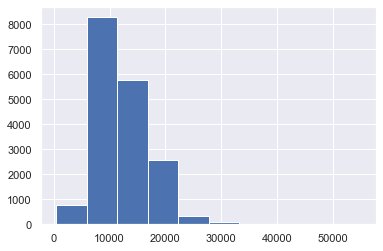

In [18]:
# Visually
Y.hist()

Looks normal distribution. But lets try als statistical test as well

In [19]:
from scipy.stats.mstats import normaltest 

Without getting into Bayesian vs. frequentist debates, for the purposes of this lesson, the following will suffice:

* This is a statistical test that tests whether a distribution is normally distributed or not. It isn't perfect, but suffice it to say: 
    * This test outputs a "p-value". The _higher_ this p-value is the _closer_ the distribution is to normal.
    * Frequentist statisticians would say that you accept that the distribution is normal (more specifically: fail to reject the null hypothesis that it is normal) if p > 0.05.

In [20]:
normaltest(Y.values)

NormaltestResult(statistic=3788.026421979386, pvalue=0.0)

pvalue=0. so normal distribution. no need any transformation on target variable

### One-hot Encoding

Create a list of categorial data and one-hot encode. Pandas one-hot encoder (get_dummies) works well with data that is defined as a categorical.

In [21]:
data_ohc=pd.get_dummies(data,drop_first=True) #by default this will convert any columns that are of type object
data_ohc.columns

Index(['price', 'mileage', 'tax', 'mpg', 'engineSize', 'age', 'model_ C-MAX',
       'model_ EcoSport', 'model_ Edge', 'model_ Escort', 'model_ Fiesta',
       'model_ Focus', 'model_ Fusion', 'model_ Galaxy', 'model_ Grand C-MAX',
       'model_ Grand Tourneo Connect', 'model_ KA', 'model_ Ka+',
       'model_ Kuga', 'model_ Mondeo', 'model_ Mustang', 'model_ Puma',
       'model_ Ranger', 'model_ S-MAX', 'model_ Streetka',
       'model_ Tourneo Connect', 'model_ Tourneo Custom',
       'model_ Transit Tourneo', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Electric', 'fuelType_Hybrid',
       'fuelType_Other', 'fuelType_Petrol'],
      dtype='object')

In [22]:
data_ohc

,price,mileage,tax,mpg,engineSize,age,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Streetka,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,12000,15944,150,57.7,1.0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,14000,9083,150,57.7,1.0,2,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,13000,12456,150,57.7,1.0,3,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,17500,10460,145,40.3,1.5,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,16500,1482,145,48.7,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17805,7999,31348,125,54.3,1.2,4,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17806,8999,16700,150,47.1,1.4,3,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17807,7499,40700,30,57.7,1.0,6,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17808,9999,7010,20,67.3,1.6,5,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [23]:
X_ohc=data_ohc.drop(['price'],axis=1)
Y_ohc=data_ohc.price

In [24]:
# Next split the data in train and test data sets
from sklearn.model_selection import train_test_split
train_ohc,test_ohc=train_test_split(data_ohc,test_size=0.3,random_state=42)

### Determing Skewed Features

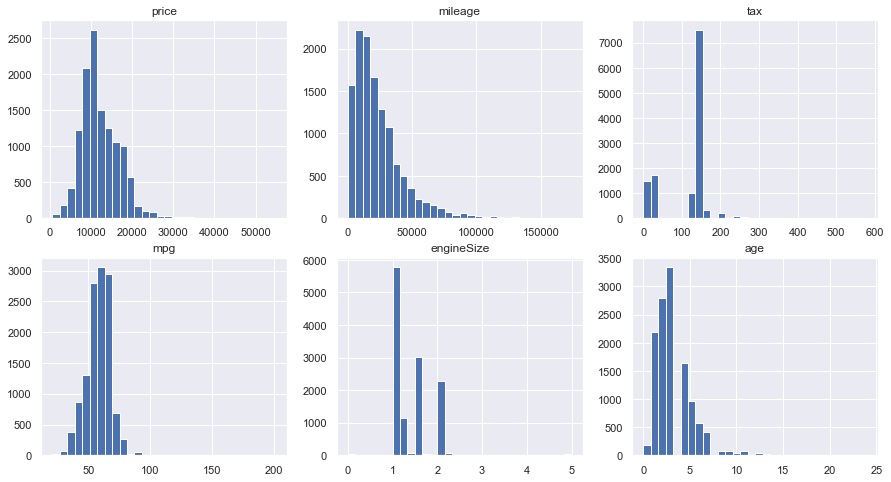

In [25]:
# Plot histogram of all numerical features. since we have total 6 columns of numerical values: 
fig,axes=plt.subplots(2,3,figsize=(15,8))
for i,ax in enumerate(axes.flatten()):
    train_ohc[train_ohc[num_cols].columns[i]].plot.hist(bins=30,ax=ax)
    ax.set_title(train_ohc[num_cols].columns[i])
    ax.get_yaxis().get_label().set_visible(False)

In [26]:
# create a list of columns that are not one hot encoded
skew_limit=0.75

skew_vals=train_ohc[num_cols].skew()
skew_cols=(skew_vals[skew_vals>skew_limit].sort_values(ascending=False).to_frame('Train_Skew'))
skew_cols # all variables whose skew>0.75



,Train_Skew
age,1.861308
mileage,1.823722
engineSize,1.806635
price,1.143463


In [27]:
# create a list of columns that are not one hot encoded
skew_limit=0.75

skew_vals_test=test_ohc[num_cols].skew()
skew_cols_test=(skew_vals_test[skew_vals_test>skew_limit].sort_values(ascending=False).to_frame('Test_Skew'))
skew_cols_test # all variables whose skew>0.75



,Test_Skew
engineSize,2.102190
age,1.884772
mileage,1.843429
price,0.984616


Transform all the columns where the skew is greater than 0.75, excluding "Price".

In [28]:
# Apply sqrt transformation on predictors only
for col in skew_cols.index.tolist():
    if col == "price":
        continue
    #train[col] = np.log1p(train[col])
    train_ohc[col] = np.sqrt(train_ohc[col])
    test_ohc[col]= np.sqrt(test_ohc[col])

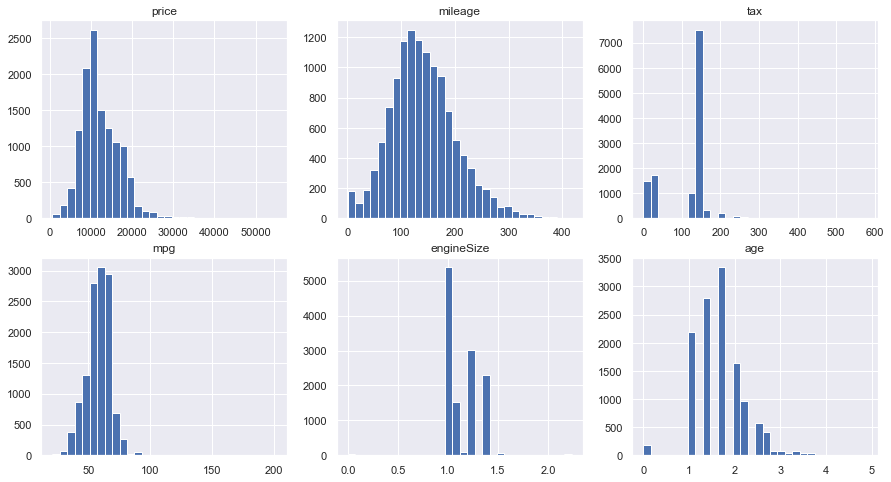

In [29]:
# Histogram plot after sqrt transformations
fig,axes=plt.subplots(2,3,figsize=(15,8))
for i,ax in enumerate(axes.flatten()):
    train_ohc[train_ohc[num_cols].columns[i]].plot.hist(bins=30,ax=ax)
    ax.set_title(train_ohc[num_cols].columns[i])
    ax.get_yaxis().get_label().set_visible(False)

In [30]:

skew_vals_test=train_ohc[num_cols].skew()
skew_vals_test.sort_values(ascending=False).to_frame('Train_Skew')

,Train_Skew
price,1.143463
mpg,0.716861
mileage,0.477056
age,0.319815
engineSize,0.233153
tax,-0.594362


In [31]:

skew_vals_test=test_ohc[num_cols].skew()
skew_vals_test.sort_values(ascending=False).to_frame('Test_Skew')


,Test_Skew
price,0.984616
mileage,0.486235
mpg,0.345026
age,0.320344
engineSize,0.273678
tax,-0.482870


In [32]:
# let reset indexes
train_ohc.reset_index(drop=True,inplace=True)
test_ohc.reset_index(drop=True,inplace=True)

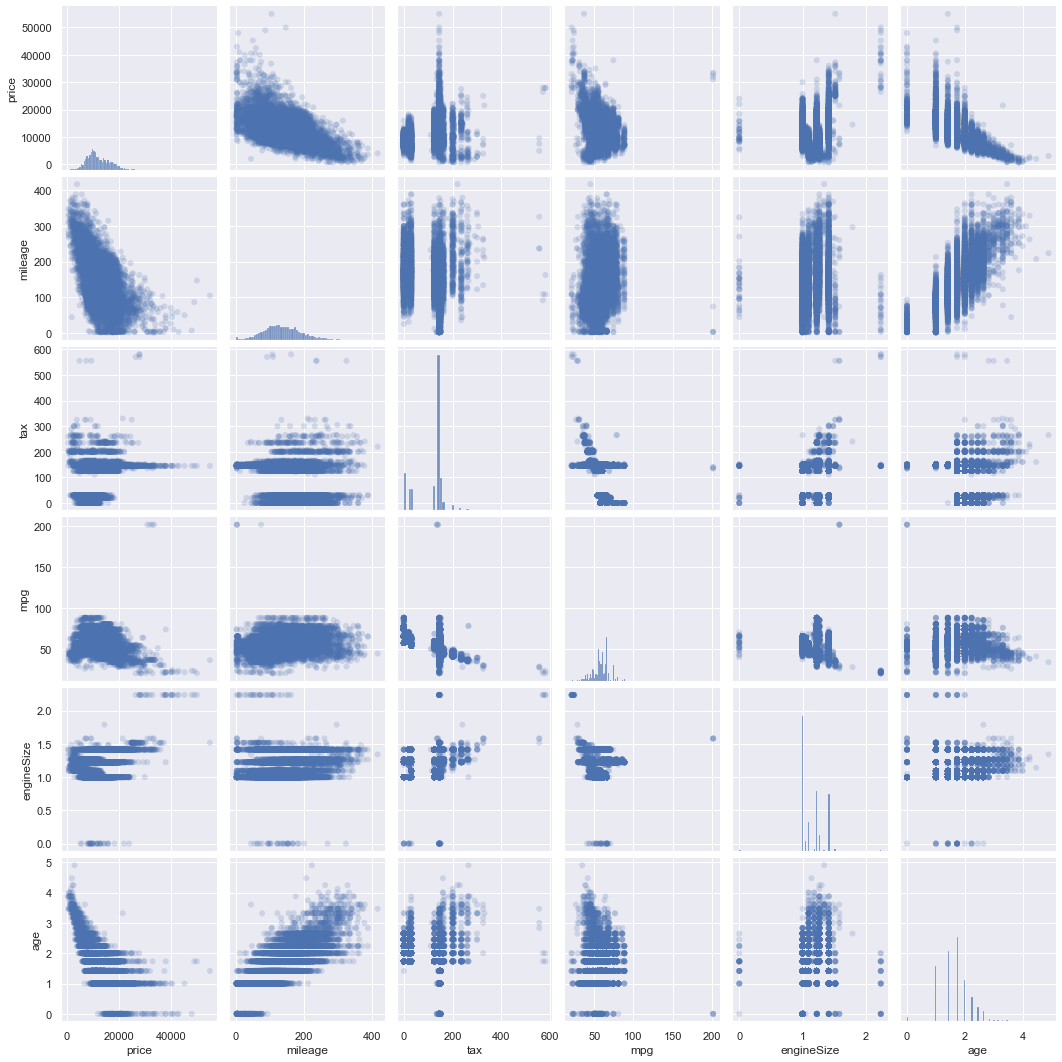

In [33]:
# Skewness is fixed. Let's use a pairplot to have an overview of these features and the target.

sns.pairplot(train_ohc[num_cols], plot_kws=dict(alpha=.2, edgecolor='none'));

This plot shows that:
- age has a linear relationship with price. It looks quite like polynomial. 
- mileage also has linear relationship with price.
- age also has a linear relationship with mileage (the older the more miles). This is multicollinearity.

Let's see how severe the multicollinearity is.

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

a=train_ohc[num_cols][['price','mileage','tax','mpg','engineSize']]

calc_vif(a)

,variables,VIF
0,price,18.152675
1,mileage,13.452396
2,tax,5.270088
3,mpg,17.056853
4,engineSize,58.423127


The features have high multicollinearity. This problem might be resolved by regularization later.

### Categorical Features

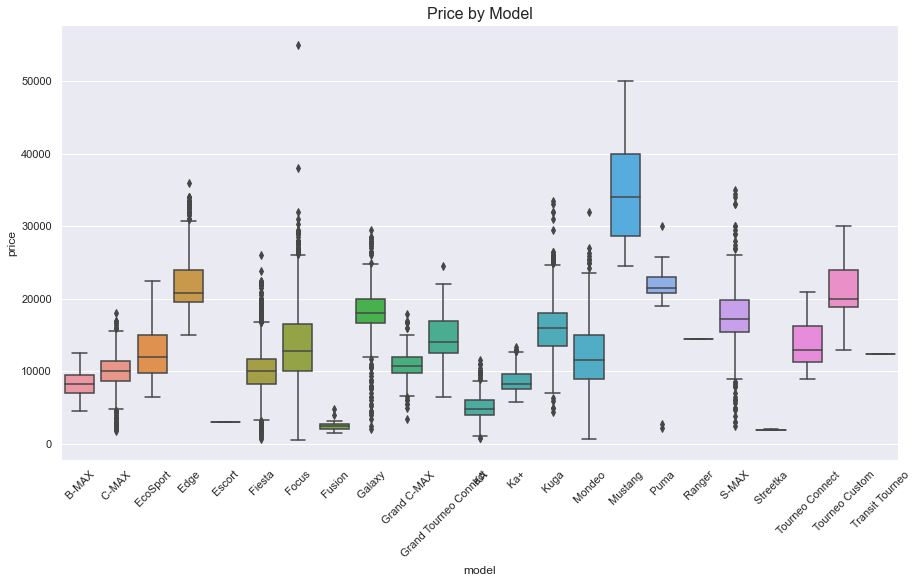

In [35]:
fig, ax = plt.subplots(figsize=(15,8))
order = sorted(list(data['model'].unique()))
sns.boxplot(x='model', y='price', data=data, order=order, ax=ax)
plt.xticks(rotation=45)
plt.title('Price by Model', fontsize=16)
plt.show()

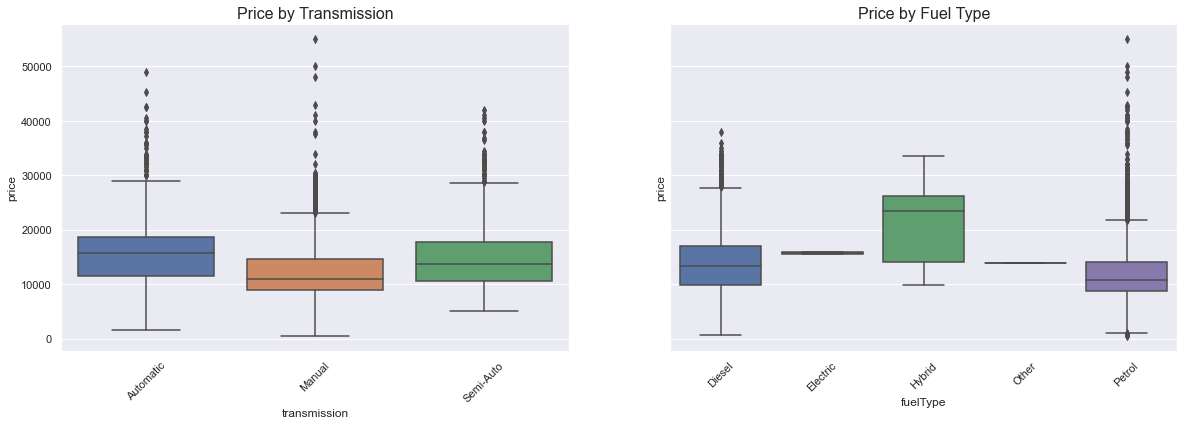

In [36]:
# Box plots of price and tranmission/ fuel type
fig, ax = plt.subplots(1, 2, figsize=(20,6), sharey=True)
order0 = sorted(list(data['transmission'].unique()))
sns.boxplot(x='transmission', y='price', data=data, order=order0, ax=ax[0])
ax[0].set_title('Price by Transmission', fontsize=16)
ax[0].tick_params('x', labelrotation=45)

order1 = sorted(list(data['fuelType'].unique()))
sns.boxplot(x='fuelType', y='price', data=data, order=order1, ax=ax[1])
ax[1].set_title('Price by Fuel Type', fontsize=16)
ax[1].tick_params('x', labelrotation=45)
plt.show()

# 2. Feature Engineering & Modelling 

In [37]:
# Lets separate features from target value
features_cols=[x for x in train_ohc.columns if x!='price']

X_train_ohc=train_ohc[features_cols]
Y_train_ohc=train_ohc['price']

X_test_ohc=test_ohc[features_cols]
Y_test_ohc=test_ohc['price']



* Write a function **`rmse`** that takes in truth and prediction values and returns the root-mean-squared error. Use sklearn's `mean_squared_error`.  


In [38]:
from sklearn.metrics import mean_squared_error


def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

### Plain Linear Regression Model without Scaling

In [39]:
error_df=[]

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

LR=LinearRegression()
lr_ohc=LR.fit(X_train_ohc,Y_train_ohc)
y_ohc_pred=lr_ohc.predict(X_test_ohc)
lr_ohc_rmse=rmse(Y_test_ohc,y_ohc_pred)
lr_ohc_r2score=r2_score(Y_test_ohc,y_ohc_pred)
num_features=X_train_ohc.shape[1]

scores={'Model':'LR_ohc no scaling','num_features':num_features,'RMSE':lr_ohc_rmse,'R2_Score':lr_ohc_r2score}
error_df=pd.DataFrame.from_dict([scores])
error_df

,Model,num_features,RMSE,R2_Score
0,LR_ohc no scaling,33,1663.270151,0.873157


### Plain Linear Regression Model with Scaling

In [40]:
from sklearn.preprocessing import StandardScaler

s=StandardScaler()
X_train_ohc_ss=s.fit_transform(X_train_ohc)

LR_ss=LinearRegression()
lr_ohc_ss=LR_ss.fit(X_train_ohc_ss,Y_train_ohc)

X_test_ohc_ss=s.transform(X_test_ohc)
y_ohc_ss_pred=lr_ohc_ss.predict(X_test_ohc_ss)

lr_ohc_ss_rmse=rmse(Y_test_ohc,y_ohc_ss_pred)
lr_ohc_ss_r2score=r2_score(Y_test_ohc,y_ohc_ss_pred)
num_features=X_train_ohc.shape[1]

scores_ss={'Model':'LR_ohc scaling','num_features':num_features,'RMSE':lr_ohc_ss_rmse,'R2_Score':lr_ohc_ss_r2score}
scores_ss
error_df=error_df.append([scores_ss])
error_df


,Model,num_features,RMSE,R2_Score
0,LR_ohc no scaling,33,1663.270151,0.873157
0,LR_ohc scaling,33,1663.270151,0.873157


it is obvious that scaling does not have any effect on LinearRegression. Besides, this data already transformed with sqrt() function above. 

### Plain Linear Regression Model without Scaling and one-hot encoding

In [41]:
# Lets separate features from target value

features_cols=[x for x in train_ohc[num_cols].columns if x!='price']

X_train_no_ohc=train_ohc[features_cols]
Y_train_no_ohc=train_ohc[num_cols]['price']

X_test_no_ohc=test_ohc[features_cols]
Y_test_no_ohc=test_ohc[num_cols]['price']

LR_no_ohc=LinearRegression()
lr_no_ohc=LR_no_ohc.fit(X_train_no_ohc,Y_train_no_ohc)
y_no_ohc_pred=lr_no_ohc.predict(X_test_no_ohc)
lr_no_ohc_rmse=rmse(Y_test_no_ohc,y_no_ohc_pred)
lr_no_ohc_r2score=r2_score(Y_test_no_ohc,y_no_ohc_pred)
num_features=X_train_no_ohc.shape[1]

scores_no_ohc={'Model':'LR_no_ohc no scaling','num_features':num_features,'RMSE':lr_no_ohc_rmse,'R2_Score':lr_no_ohc_r2score}

error_df=error_df.append([scores_no_ohc])
error_df

,Model,num_features,RMSE,R2_Score
0,LR_ohc no scaling,33,1663.270151,0.873157
0,LR_ohc scaling,33,1663.270151,0.873157
0,LR_no_ohc no scaling,5,2390.032955,0.738092


### Plain Linear Regression Model with Scaling,but no one-hot encoding

In [42]:

features_cols=[x for x in train_ohc[num_cols].columns if x!='price']

X_train_no_ohc=train_ohc[features_cols]
Y_train_no_ohc=train_ohc[num_cols]['price']

X_test_no_ohc=test_ohc[features_cols]
Y_test_no_ohc=test_ohc[num_cols]['price']

s2=StandardScaler()
X_train_no_ohc_ss=s2.fit_transform(X_train_no_ohc)

LR_no_ohc_ss=LinearRegression()
lr_no_ohc_ss=LR_no_ohc_ss.fit(X_train_no_ohc_ss,Y_train_no_ohc)

X_test_no_ohc_ss=s2.transform(X_test_no_ohc)
y_no_ohc_ss_pred=lr_no_ohc_ss.predict(X_test_no_ohc_ss)

lr_no_ohc_ss_rmse=rmse(Y_test_no_ohc,y_no_ohc_ss_pred)
lr_no_ohc_ss_r2score=r2_score(Y_test_no_ohc,y_no_ohc_ss_pred)
num_features=X_train_no_ohc.shape[1]

scores_no_ohc_ss={'Model':'LR_no_ohc with scaling','num_features':num_features,'RMSE':lr_no_ohc_ss_rmse,'R2_Score':lr_no_ohc_ss_r2score}

error_df=error_df.append([scores_no_ohc_ss])
error_df

,Model,num_features,RMSE,R2_Score
0,LR_ohc no scaling,33,1663.270151,0.873157
0,LR_ohc scaling,33,1663.270151,0.873157
0,LR_no_ohc no scaling,5,2390.032955,0.738092
0,LR_no_ohc with scaling,5,2390.032955,0.738092


From the 'error_df' dataframe, it's seen that one-hot encoding clearly increases R2 score and decreases error values. From now, I will be using the encoded features for future analysis and modelling

### Polynomial Features

Here I created polynomialfeatures on the floats only, excluding the one hot encoded columns, and then combined the new polynomial features with one hot encoded columns to create new dataframe.Afer that I applied Vanilla Linear Regression on this new dataframe.

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

scores_pf=pd.DataFrame(columns=['PF degree', 'Number of features', 'RMSE', 'R2_Score'])
X_ohc_float=X_ohc[num_cols[1:]]
for m in range(1,7):
    pf=PolynomialFeatures(degree=m,include_bias=False)
    X_ohc_pf=pf.fit_transform(X_ohc_float)
    a=pd.DataFrame(X_ohc_pf,columns=pf.get_feature_names(input_features=num_cols[1:]))
    X_ohc_pf_2=a.join(X_ohc[X_ohc.columns[~X_ohc.columns.isin(num_cols)].tolist()])   
    X_ohc_pf_train,X_ohc_pf_test,Y_train,Y_test=train_test_split(X_ohc_pf_2,Y_ohc,test_size=0.3,random_state=42)
    LR=LinearRegression()
    LR.fit(X_ohc_pf_train,Y_train)
    y_pred=LR.predict(X_ohc_pf_test)
    LR_pf_r2score=r2_score(y_pred,Y_test)
    LR_pf_RMSE=rmse(y_pred,Y_test)
    
    num_features=X_ohc_pf_2.shape[1]
    
    error_pf={'PF Degree':m,'Number of features':num_features,'RMSE':LR_pf_RMSE,'R2_Score':LR_pf_r2score}
    scores_pf=scores_pf.append(error_pf,ignore_index=True)
scores_pf    

,PF degree,Number of features,RMSE,R2_Score,PF Degree
0,NaN,33.0,1783.886599,0.830417,1.0
1,NaN,48.0,1546.725253,0.879034,2.0
2,NaN,83.0,1604.875571,0.872347,3.0
3,NaN,153.0,2340.364944,0.715962,4.0
4,NaN,279.0,7149.831697,0.024112,5.0
5,NaN,489.0,5672.504103,-0.153786,6.0


it seems polynomial **'degree=2'** gives best **RMSE=1546.72** and **R2_score=0.879034**. It is better than previous **LR_ohc scaling** model, which gave **RMSE=1663.270151** and **R2=0.873157**

### Vanilla Linear Regression

In [44]:
from sklearn.model_selection import KFold, cross_val_predict, GridSearchCV
from sklearn.pipeline import Pipeline

kf = KFold(shuffle=True, random_state=42, n_splits=5)
estimator = Pipeline([
                      ("polynomial_features", PolynomialFeatures()),  
                      
                      ("linear_regression", LinearRegression())])
params = {"polynomial_features__degree": range(3),}
Vanil_grid = GridSearchCV(estimator, params, cv=kf)
Vanil_grid.fit(X_ohc, Y_ohc)

Vanil_grid.best_score_, Vanil_grid.best_params_

(0.902309156796415, {'polynomial_features__degree': 2})

In [45]:
from sklearn.metrics import mean_squared_error

def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

#X_train_ohc,X_test_ohc,Y_train_ohc,Y_test_ohc=train_test_split(X_ohc, Y_ohc,test_size=0.3,random_state=42)

error_matrix=[]


In [46]:

best_vanilla_estimator = Pipeline([
                    ("scaler", StandardScaler()),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("vanilla_regression", LinearRegression())])

best_vanilla_estimator.fit(X_ohc, Y_ohc)
LR_predict=best_vanilla_estimator.predict(X_ohc)

LR_rmse=rmse(Y_ohc,LR_predict)
LR_r2score=r2_score(Y_ohc,LR_predict)

model_scores={'Model':'Vanilla LinearRegresson','RMSE':LR_rmse,'R2_Score':LR_r2score,'alpha':'NA',}
model_error_matrix=pd.DataFrame.from_dict([model_scores])
model_error_matrix      
              

,Model,RMSE,R2_Score,alpha
0,Vanilla LinearRegresson,1346.431386,0.919179,NA


In [47]:
from sklearn.model_selection import KFold, cross_val_predict, GridSearchCV
from sklearn.pipeline import Pipeline
splitss=[]
for k in range(2,10):
    kf = KFold(shuffle=True, random_state=42, n_splits=k)
    estimator = Pipeline([("polynomial_features", PolynomialFeatures()),("linear_regression", LinearRegression())])       
              
    params = {"polynomial_features__degree": range(3),}
    grid = GridSearchCV(estimator, params, cv=kf)
    grid.fit(X_ohc, Y_ohc)
    splitss.append(grid.best_score_)
    
splitss


[0.8458331023702216,
 0.8970081003193395,
 0.8516323804828236,
 0.902309156796415,
 0.9033313951176059,
 0.9051166548580392,
 0.9047236676900003,
 0.9034623266185913]

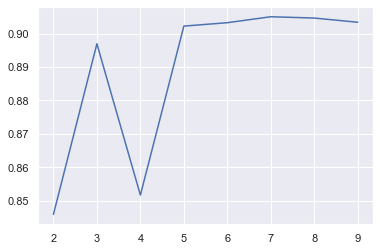

In [48]:
y=splitss
x=range(2,10)
import matplotlib.pyplot as plt
plt.plot(x,y)

k=5 splits is the optimum one

### Lasso Regression

In [49]:

kf = KFold(shuffle=True, random_state=42, n_splits=5)

estimator = Pipeline([("polynomial_features", PolynomialFeatures()),
                      ("Scaler",StandardScaler()),
                      ("lasso_regression", Lasso())])       
        

params = {"polynomial_features__degree": range(3),
          "lasso_regression__alpha":np.geomspace(0.01,30,10)
         }

grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X_ohc, Y_ohc)

grid.best_score_, grid.best_params_

(0.9109758480525951,
 {'lasso_regression__alpha': 0.8545432152652083,
  'polynomial_features__degree': 2})

In [50]:
best_lasso_estimator = Pipeline([
                    
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("scaler", StandardScaler()),
                    ("lasso_regression", Lasso(alpha=0.8545432152652083))])

best_lasso_estimator.fit(X_ohc, Y_ohc)
best_lasso_estimator.score(X_ohc, Y_ohc)

0.9178430433169175

In [51]:
best_lasso_estimator = Pipeline([
                    
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("scaler", StandardScaler()),
                    ("lasso_regression", Lasso(alpha=0.8545432152652083))])

best_lasso_estimator.fit(X_ohc, Y_ohc)
Lasso_predict=best_lasso_estimator.predict(X_ohc)

Lasso_rmse=rmse(Y_ohc,Lasso_predict)
Lasso_r2score=r2_score(Y_ohc,Lasso_predict)

model_scores={'Model':'Lasso LinearRegresson','RMSE':Lasso_rmse,'R2_Score':Lasso_r2score}
model_error_matrix=model_error_matrix.append([model_scores])
model_error_matrix

,Model,RMSE,R2_Score,alpha
0,Vanilla LinearRegresson,1346.431386,0.919179,NA
0,Lasso LinearRegresson,1357.517804,0.917843,NaN


### Ridge Regression

In [52]:
kf = KFold(shuffle=True, random_state=42, n_splits=5)

estimator = Pipeline([("polynomial_features", PolynomialFeatures()),
                      ("Scaler",StandardScaler()),
                      ("ridge_regression", Ridge())])       
        

params = {"polynomial_features__degree": range(3),
          "ridge_regression__alpha":np.geomspace(0.01,30,10)
         }

grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X_ohc, Y_ohc)

grid.best_score_, grid.best_params_

(0.9111322835757928,
 {'polynomial_features__degree': 2,
  'ridge_regression__alpha': 12.324645850253583})

In [53]:
best_ridge_estimator = Pipeline([
                    
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("scaler", StandardScaler()),
                    ("ridge_regression", Ridge(alpha=12.324645850253583))])

best_ridge_estimator.fit(X_ohc, Y_ohc)
Ridge_predict=best_ridge_estimator.predict(X_ohc)

Ridge_rmse=rmse(Y_ohc,Ridge_predict)
Ridge_r2score=r2_score(Y_ohc,Ridge_predict)

model_scores={'Model':'Ridge LinearRegresson','RMSE':Ridge_rmse,'R2_Score':Ridge_r2score}
model_error_matrix=model_error_matrix.append([model_scores])
model_error_matrix

,Model,RMSE,R2_Score,alpha
0,Vanilla LinearRegresson,1346.431386,0.919179,NA
0,Lasso LinearRegresson,1357.517804,0.917843,NaN
0,Ridge LinearRegresson,1355.975876,0.918030,NaN


### ElasticNet Regression

In [54]:
from sklearn.linear_model import ElasticNet
kf = KFold(shuffle=True, random_state=42, n_splits=5)

estimator = Pipeline([("polynomial_features", PolynomialFeatures()),
                      ("Scaler",StandardScaler()),
                      ("ElasticNetRegression", ElasticNet())])       
        

params = {"polynomial_features__degree": range(3),
          "ElasticNetRegression__alpha":np.geomspace(0.01,30,10),
          "ElasticNetRegression__l1_ratio":np.arange(0,1,0.1)
         }

grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X_ohc, Y_ohc)

grid.best_score_, grid.best_params_

(0.9111251018017528,
 {'ElasticNetRegression__alpha': 0.01,
  'ElasticNetRegression__l1_ratio': 0.9,
  'polynomial_features__degree': 2})

In [55]:
best_ElasticNet_estimator = Pipeline([
                    
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("scaler", StandardScaler()),
                    ("ElasticNet_regression", ElasticNet(alpha=0.01,l1_ratio=0.9))])

best_ElasticNet_estimator.fit(X_ohc, Y_ohc)
best_ElasticNet_estimator.score(X_ohc, Y_ohc)

0.9176892788271231

In [56]:
best_ElasticNet_estimator = Pipeline([
                    
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("scaler", StandardScaler()),
                    ("ElasticNet_regression", ElasticNet(alpha=0.01,l1_ratio=0.9))])

best_ElasticNet_estimator.fit(X_ohc, Y_ohc)
ElasticNet_predict=best_ElasticNet_estimator.predict(X_ohc)

ElasticNet_rmse=rmse(Y_ohc,ElasticNet_predict)
ElasticNet_r2score=r2_score(Y_ohc,ElasticNet_predict)

model_scores={'Model':'ElasticNet LinearRegresson','RMSE':ElasticNet_rmse,'R2_Score':ElasticNet_r2score}
model_error_matrix=model_error_matrix.append([model_scores])
model_error_matrix

,Model,RMSE,R2_Score,alpha
0,Vanilla LinearRegresson,1346.431386,0.919179,NA
0,Lasso LinearRegresson,1357.517804,0.917843,NaN
0,Ridge LinearRegresson,1355.975876,0.918030,NaN
0,ElasticNet LinearRegresson,1358.787571,0.917689,NaN


## Prediction on the test set

Lets use 4 models to make predictions on the test set and see how these models' performance are.

In [57]:
X_train_ohc,X_test_ohc,Y_train_ohc,Y_test_ohc=train_test_split(X_ohc, Y_ohc,test_size=0.3,random_state=42)

best_ElasticNet_estimator = Pipeline([
                    
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("scaler", StandardScaler()),
                    ("ElasticNet_regression", ElasticNet(alpha=0.01,l1_ratio=0.9))])

ElasticNet_predict2=best_ElasticNet_estimator.fit(X_train_ohc, Y_train_ohc).predict(X_test_ohc)

ElasticNet_rmse2=rmse(Y_test_ohc,ElasticNet_predict2)
ElasticNet_r2score2=r2_score(Y_test_ohc,ElasticNet_predict2)

model_scores2={'Model':'Elastic Net Regresson','RMSE':ElasticNet_rmse2,'R2_Score':ElasticNet_r2score2}
model_error_matrix2=pd.DataFrame.from_dict([model_scores2])
model_error_matrix2




,Model,RMSE,R2_Score
0,Elastic Net Regresson,1374.348015,0.913397


In [58]:
X_train_ohc,X_test_ohc,Y_train_ohc,Y_test_ohc=train_test_split(X_ohc, Y_ohc,test_size=0.3,random_state=42)

best_Ridge_estimator = Pipeline([
                    
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("scaler", StandardScaler()),
                    ("ridge_regression", Ridge(alpha=12.324645850253583))])

Ridge_predict2=best_Ridge_estimator.fit(X_train_ohc, Y_train_ohc).predict(X_test_ohc)

Ridge_rmse2=rmse(Y_test_ohc,Ridge_predict2)
Ridge_r2score2=r2_score(Y_test_ohc,Ridge_predict2)

model_scores2={'Model':'Ridge LinearRegresson','RMSE':Ridge_rmse2,'R2_Score':Ridge_r2score2}
model_error_matrix2=model_error_matrix2.append([model_scores2])
model_error_matrix2



,Model,RMSE,R2_Score
0,Elastic Net Regresson,1374.348015,0.913397
0,Ridge LinearRegresson,1371.846729,0.913712


In [59]:

X_train_ohc,X_test_ohc,Y_train_ohc,Y_test_ohc=train_test_split(X_ohc, Y_ohc,test_size=0.3,random_state=42)


best_lasso_estimator = Pipeline([
                    
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("scaler", StandardScaler()),
                    ("lasso_regression", Lasso(alpha=0.8545432152652083))])

Lasso_predict2=best_lasso_estimator.fit(X_train_ohc, Y_train_ohc).predict(X_test_ohc)

Lasso_rmse2=rmse(Y_test_ohc,Lasso_predict2)
Lasso_r2score2=r2_score(Y_test_ohc,Lasso_predict2)

model_scores2={'Model':'Lasso LinearRegresson','RMSE':Lasso_rmse2,'R2_Score':Lasso_r2score2}
model_error_matrix2=model_error_matrix2.append([model_scores2])
model_error_matrix2

         
                    


,Model,RMSE,R2_Score
0,Elastic Net Regresson,1374.348015,0.913397
0,Ridge LinearRegresson,1371.846729,0.913712
0,Lasso LinearRegresson,1392.551583,0.911087


In [60]:
X_train_ohc,X_test_ohc,Y_train_ohc,Y_test_ohc=train_test_split(X_ohc, Y_ohc,test_size=0.3,random_state=42)

best_vanilla_estimator = Pipeline([
                     
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    #("scaler", StandardScaler()),
                    ("vanilla_regression", LinearRegression())])

Vanilla_predict2=best_vanilla_estimator.fit(X_train_ohc, Y_train_ohc).predict(X_test_ohc)

Vanilla_rmse2=rmse(Y_test_ohc,Vanilla_predict2)
Vanilla_r2score2=r2_score(Y_test_ohc,Vanilla_predict2)

model_scores2={'Model':'Vanilla LinearRegresson','RMSE':Vanilla_rmse2,'R2_Score':Vanilla_r2score2}
model_error_matrix2=model_error_matrix2.append([model_scores2])
model_error_matrix2

,Model,RMSE,R2_Score
0,Elastic Net Regresson,1374.348015,0.913397
0,Ridge LinearRegresson,1371.846729,0.913712
0,Lasso LinearRegresson,1392.551583,0.911087
0,Vanilla LinearRegresson,1413.233066,0.908427


### Scatter plots from four models

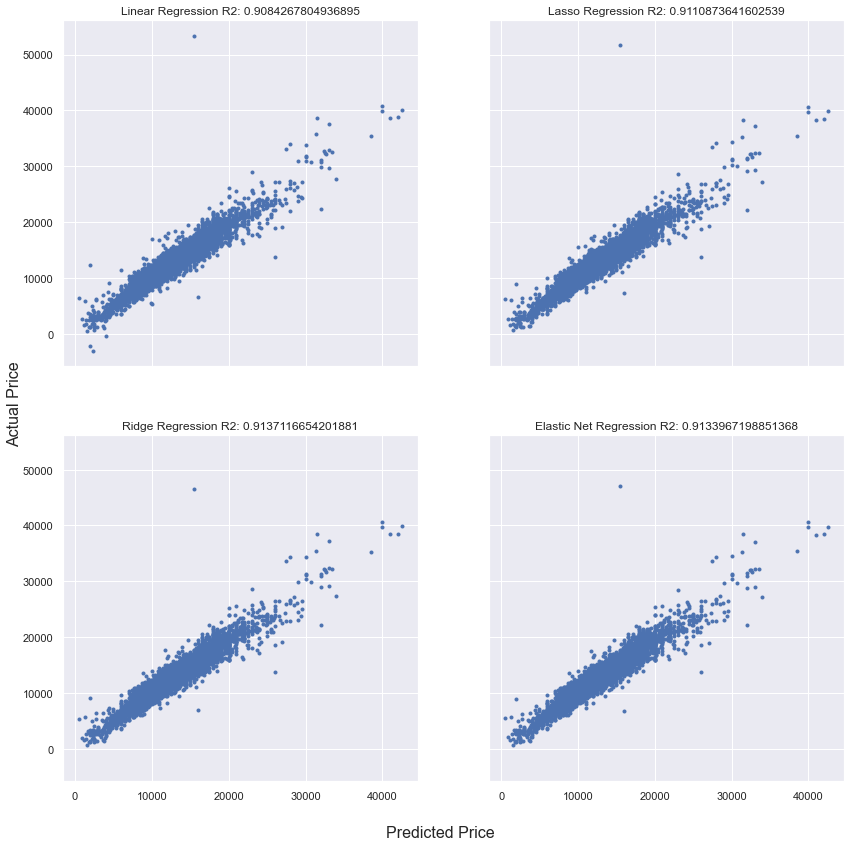

In [61]:
# Make prediction on the test set and plot four scatter plots separately

fig, axes = plt.subplots(2,2, figsize=(14,14), sharex=True, sharey=True)
fig.text(0.5, 0.07, 'Predicted Price', ha='center', fontdict={'size': 16})
fig.text(0.07, 0.5, 'Actual Price', va='center', rotation='vertical', fontdict={'size': 16})


models=[Vanilla_predict2,Lasso_predict2,Ridge_predict2,ElasticNet_predict2]

labels = ['Linear', 'Lasso', 'Ridge', 'Elastic Net']

for i, ax in enumerate(axes.flatten()):
    y_pred=models[i]

    r_squared = r2_score(Y_test_ohc, y_pred)

    ax.plot(Y_test_ohc, y_pred, marker='o', ls='', ms=3.0)
    ax.set(title=f'{labels[i]} Regression R2: {r_squared}')

Ridge Regression has the best prediction on the test set. All these models can explain the target around 90% - 91%

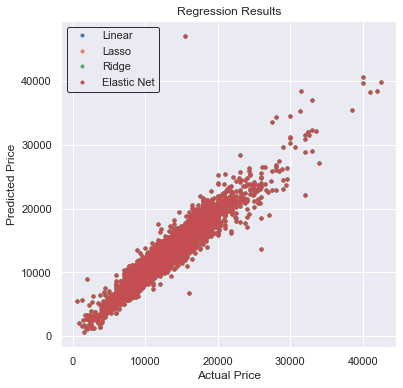

In [62]:
# Make prediction on the test set and plot one combined scatter plot

fig = plt.figure(figsize=(6,6))
ax = plt.axes()

models=[Vanilla_predict2,Lasso_predict2,Ridge_predict2,ElasticNet_predict2]
         
labels = ['Linear','Lasso','Ridge','Elastic Net']

for mod, lab in zip(models, labels):
    y_pred=models[i]
    ax.plot(Y_test_ohc, y_pred, marker='o', ls='', ms=3.0, label=lab)

leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       title='Regression Results');

As expected, these plots are nearly identical.

## Feature IMportance


As shown above, the Ridge Regression is our best model.Let's see which feature is the most important in the model.

In [63]:
best_Ridge_estimator = Pipeline([
                    
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("scaler", StandardScaler()),
                    ("ridge_regression", Ridge(alpha=12.324645850253583))])

best_Ridge_estimator.fit(X_train_ohc, Y_train_ohc)

Pipeline(steps=[('make_higher_degree', PolynomialFeatures()),
                ('scaler', StandardScaler()),
                ('ridge_regression', Ridge(alpha=12.324645850253583))])

In [64]:
best_Ridge_estimator.named_steps["ridge_regression"].coef_

array([ 0.00000000e+00, -2.23808507e+03,  1.13842293e+03, -4.11612769e+02,
       -4.66329877e+01, -2.25025505e+03, -9.75397340e+01, -5.40794082e+01,
        8.08482791e+02, -6.72008589e+00, -1.19180337e+02,  6.63487798e+02,
        3.65101758e+01,  2.09699036e+01,  3.36697324e+01, -6.55030740e+01,
       -3.12497021e+02, -2.06913987e+02,  4.37063985e+02, -6.94226552e+01,
        5.80364416e+01,  2.01382179e+02, -5.88635616e+00,  5.63079346e+02,
       -4.35413878e+00, -5.70140290e+01,  4.54707356e+02,  1.00662036e+00,
       -4.13289477e+02,  3.10229674e+02,  2.23336602e-01,  2.14297937e+01,
       -3.24343489e-01,  8.61902556e+02,  4.00151493e+02, -8.50609403e+01,
        5.13183060e+02, -5.30210170e+01,  8.63923137e+02, -2.92058609e+01,
        1.56613163e+00, -3.54539853e+01, -6.72008589e+00, -1.26592633e+02,
       -2.95469801e+02, -2.06409622e+01, -1.19951519e+02, -2.27861209e+01,
       -7.29594709e+01, -2.20006521e+01,  2.01643319e+01, -9.39941855e+01,
       -2.22205777e+02, -

In [107]:
df_importances = pd.DataFrame(zip(best_Ridge_estimator.named_steps["make_higher_degree"].get_feature_names(input_features=X_train_ohc.columns),
                 best_Ridge_estimator.named_steps["ridge_regression"].coef_,
))
df_importances=df_importances.sort_values(by=1,ascending=False)
print(df_importances.head(10))
print('-'*50)
print(df_importances.tail(10))      

                                  0            1
130                    engineSize^2  3508.261724
137         engineSize model_ Focus  1561.488067
99                            mpg^2  1521.231749
116              mpg model_ Mustang  1466.554393
114                 mpg model_ Kuga  1440.040517
160                           age^2  1329.409522
2                               tax  1138.422930
136        engineSize model_ Fiesta   933.009799
115               mpg model_ Mondeo   927.275297
154  engineSize transmission_Manual   922.236183
--------------------------------------------------
                              0            1
129         mpg fuelType_Petrol  -629.394587
166            age model_ Focus  -911.286047
107            mpg model_ Focus -1009.668487
70                      tax age -1115.762366
159  engineSize fuelType_Petrol -1246.884564
104             mpg model_ Edge -1298.331059
146   engineSize model_ Mustang -1743.989248
100              mpg engineSize -2113.354677
1    

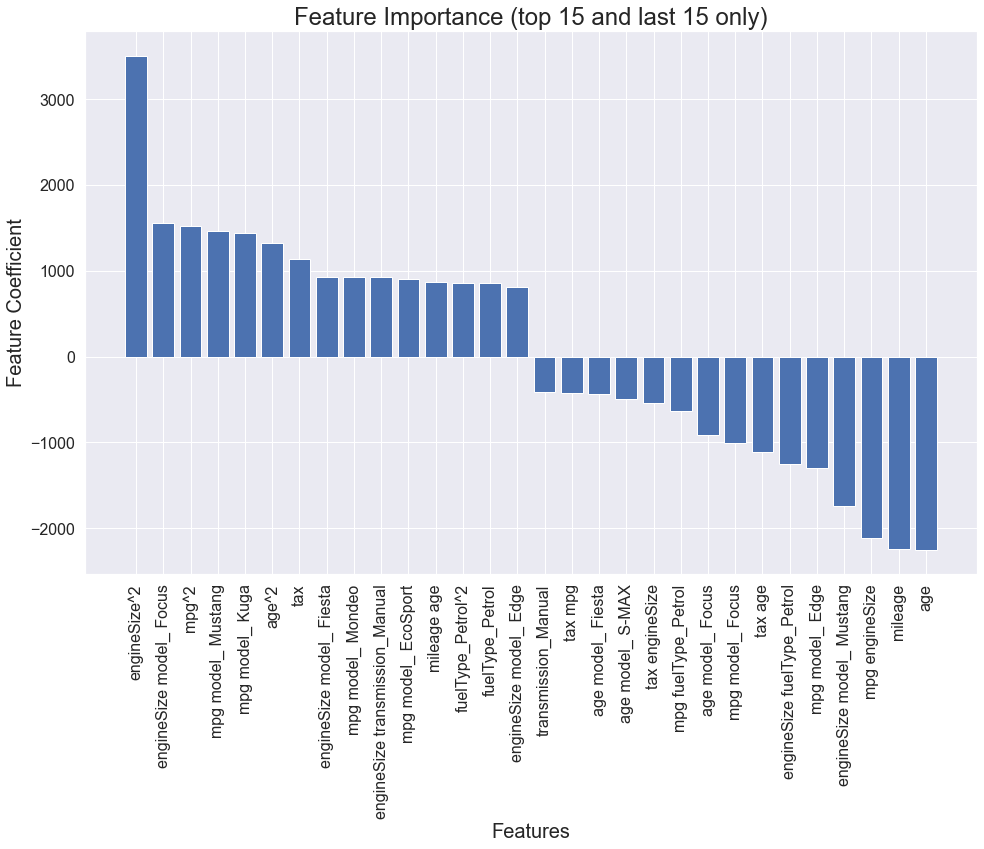

In [103]:
top15_df_importances=df_importances.head(15)
last15_df_importances=df_importances.tail(15)
a=[top15_df_importances,last15_df_importances]
a=pd.concat(a)


import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
plt.bar(a[0],a[1])
plt.xticks(rotation = 90)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Features',fontsize=20)
plt.ylabel('Feature Coefficient',fontsize=20)
plt.title('Feature Importance (top 15 and last 15 only)',fontsize=24)

plt.show()

In [68]:
# Features that Ridge eliminated
df_importances[df_importances[1] == 0]

,0,1
406,model_ Grand Tourneo Connect model_ KA,0.0
409,model_ Grand Tourneo Connect model_ Mondeo,0.0
408,model_ Grand Tourneo Connect model_ Kuga,0.0
334,model_ Focus model_ Tourneo Custom,0.0
407,model_ Grand Tourneo Connect model_ Ka+,0.0
...,...,...
263,model_ Edge model_ Transit Tourneo,0.0
285,model_ Escort model_ Streetka,0.0
284,model_ Escort model_ S-MAX,0.0
282,model_ Escort model_ Puma,0.0
